# 텐서플로우를 이용한 오토인코더 (Autoencoder) 예제

대표적인 unsupervised learning의 하나인 오토인코더에 대해 살펴 봅니다. 오토인코더는 입력 값으로 이미지만 들어가게 되며 (레이블 없음) 은닉 계층의 노드의 수가 입력 계층의 노드수보다 적도록 구성합니다. 출력 계층의 노드 수는 입력 계층의 노드 수와 동일합니다. 은닉 계층의 노드 수가 적기 때문에 주요 특징량 (feature) 위주로 추출을 하게 되어 마치 PCA (Principal Component Analysis) 에서와 유사한 효과를 얻을 수 있습니다. 출력 계층에서는 입력 계층의 값을 복원 (reconstruction) 할 수 있습니다. 

### 1. 필요한 모듈들을 불러옵니다. 

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('./data/mnist/', one_hot=True)

Extracting ./data/mnist/train-images-idx3-ubyte.gz
Extracting ./data/mnist/train-labels-idx1-ubyte.gz
Extracting ./data/mnist/t10k-images-idx3-ubyte.gz
Extracting ./data/mnist/t10k-labels-idx1-ubyte.gz


### 2. 하이퍼 파라미터 설정

우리가 구축하고자 하는 오토인코더는 아래와 같이 구성됩니다.
* 입력 계층의 노드 수 : MNIST 이미지의 픽셀수와 동일. 28 x 28 = 784
* 은닉 계층의 노드 수 : 256 (784 보다 작은 값으로 설정)
* 출력 계층의 노드 수 : 입력계층의 노드수와 동일. 28 x 28 = 784

오토인코더는 인코더와 디코더로 구성됩니다.
* Encoder : 입력 계층 --> 은닉 계층
* Decoder : 은닉 계층 --> 출력 계층

In [7]:
# Model 관련 hyperparameters
num_input = 28*28 # "입력 계층 노드 수 == 출력 계층 노드 수" 이므로 num_output은 따로 정의하지 않았습니다.
num_hidden = 256

# Learning 관련 hyperparameters
learning_rate = 0.01
training_epoch = 10
batch_size = 100

# Evaluation 관련 hyperparameters
num_output_sample = 10

### 3. 모델 만들기

Autoencoder에서는 label이 없습니다. 그러므로 입력값으로 x_true만 주면 됩니다.

In [8]:
x_true = tf.placeholder(tf.float32, [None, num_input])

다만 loss function의 기준으로 삼기 위해 y_true를 x_true와 동일하게 설정해 줍니다. 

In [9]:
y_true = x_true

Encoder의 가중치와 바이어스를 정의해 줍니다.

In [12]:
weight_encoder = tf.Variable(tf.truncated_normal([num_input, num_hidden]))
bias_encoder = tf.Variable(tf.truncated_normal([num_hidden]))

Decoder의 가중치와 바이어스를 정의해 줍니다. 

In [13]:
weight_decoder = tf.Variable(tf.truncated_normal([num_hidden, num_input]))
bias_decoder = tf.Variable(tf.truncated_normal([num_input]))

Encoder와 decoder에 linear 연산과 non-linearity를 적용해 줍니다. 

In [14]:
encoder = tf.nn.sigmoid(tf.add(tf.matmul(x_true, weight_encoder), bias_encoder))
decoder = tf.nn.sigmoid(tf.add(tf.matmul(encoder, weight_decoder), bias_decoder))

y_true (원본 이미지) 와 decoder의 결과 값의 차이가 비용이 됩니다. 
* cost를 최소화하기 위해 학습을 진행하게 됩니다. 

In [16]:
cost = tf.reduce_mean(tf.square(y_true - decoder))
optimizer = tf.train.AdamOptimizer(learning_rate)
optimizer = optimizer.minimize(cost)

### 4. 모델 학습시키기

In [17]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [18]:
total_batch = mnist.train.num_examples/batch_size # 550

In [19]:
for epoch in range(training_epoch):
    total_cost = 0
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_value = sess.run([optimizer, cost], {x_true:batch_xs})
        total_cost += cost_value
    print "Epoch : {0}, Cost : {1}".format(epoch+1, total_cost/total_batch)
print "최적화가 완료되었습니다."

Epoch : 1, Cost : 0.053889535591
Epoch : 2, Cost : 0.0289198573306
Epoch : 3, Cost : 0.0247277187353
Epoch : 4, Cost : 0.0222807110474
Epoch : 5, Cost : 0.0211536369337
Epoch : 6, Cost : 0.0200326601992
Epoch : 7, Cost : 0.0193551677042
Epoch : 8, Cost : 0.0190374543772
Epoch : 9, Cost : 0.0186895289712
Epoch : 10, Cost : 0.0185069922409
최적화가 완료되었습니다.


### 5. 평가하기

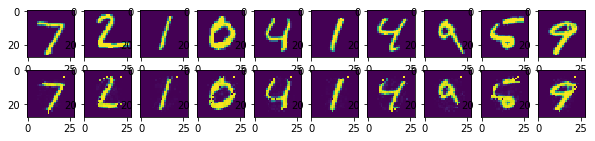

In [22]:
samples = sess.run(decoder, {x_true: mnist.test.images[:num_output_sample]})
fig, ax = plt.subplots(2, num_output_sample, figsize=(num_output_sample,2))
for i in range(num_output_sample):
    ax[0][i].set_axis_off
    ax[1][i].set_axis_off
    ax[0][i].imshow(np.reshape(mnist.test.images[i], (28,28)))
    ax[1][i].imshow(np.reshape(samples[i], (28,28)))
plt.show()